In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Loading preprocessed data


data = np.load("/Users/sauravbania/My Projects/Uncertainty-Quantification-CMS/processed/processed_dataset.npz")

# Extract variables
X_val = data["X_val"]
y_val = data["y_val"]
pT_val_nonzero = data["pT_val_nonzero"]
eta_val_nonzero = data["eta_val_nonzero"]
azm_val_nonzero = data["azm_val_nonzero"]
pT_quark = data["pT_quark"]
pT_gluon = data["pT_gluon"]
eta_quark = data["eta_quark"]
eta_gluon = data["eta_gluon"]
azm_quark = data["azm_quark"]
azm_gluon = data["azm_gluon"]

In [2]:
# print(pT_quark[:1])

# Hypothesis Testing: Comparing Quark and Gluon Jet Distributions

## Objective
The goal of this hypothesis test is to determine whether the **transverse momentum ($p_T$) distributions** of **quark jets** and **gluon jets** are significantly different.

## Statistical Method: Kolmogorov-Smirnov (KS) Test
To compare the **$p_T$ distributions**, we use the **Kolmogorov-Smirnov (KS) test**, which measures the maximum difference between the **cumulative distribution functions (CDFs)** of the two datasets.

### Null Hypothesis ($H_0$)
- The **$p_T$ distributions** of quark and gluon jets are **drawn from the same underlying distribution**.
- In other words, there is **no significant difference** between the two distributions.

### Alternative Hypothesis ($H_A$)
- The **$p_T$ distributions** of quark and gluon jets **are significantly different**.
- This means that quark jets and gluon jets **follow different momentum distributions**, which aligns with theoretical expectations.

## Why Use the KS Test?
The **KS test** is ideal for this case because:
1. **It does not assume normality** – Works for any distribution, even skewed ones like $p_T$.
2. **It compares the entire shape** of the distributions, not just the mean.
3. **It is sensitive to differences in both shape and location** of the distributions.

## Interpreting the Results
The KS test outputs:
- **D-statistic**: The maximum difference between the two CDFs.
- **p-value**: The probability of observing this difference if the distributions were actually the same.

### Decision Rule
- If **p-value < 0.05**: Reject the **null hypothesis ($H_0$)** → The distributions **are significantly different**.
- If **p-value ≥ 0.05**: Fail to reject **$H_0$** → No strong evidence that the distributions are different.


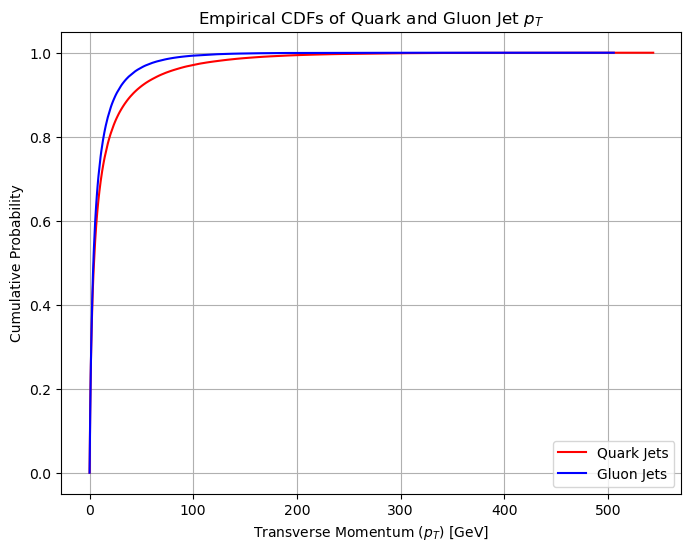

KS Statistic (pT): 0.0630
P-value (pT): 0.000000


In [3]:
from scipy.stats import ks_2samp

# sorting and computing the empirical cdf
def compute_empirical_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# For pT
pT_quark_sorted, quark_pT_cdf = compute_empirical_cdf(pT_quark)
pT_gluon_sorted, gluon_pT_cdf = compute_empirical_cdf(pT_gluon)

# For eta
eta_quark_sorted, quark_eta_cdf = compute_empirical_cdf(eta_quark)
eta_gluon_sorted, gluon_eta_cdf = compute_empirical_cdf(eta_gluon)

# For azimuthal angle
azm_quark_sorted, quark_azm_cdf = compute_empirical_cdf(azm_quark)
azm_gluon_sorted, gluon_azm_cdf = compute_empirical_cdf(azm_gluon)


# Plot the CDFs
plt.figure(figsize=(8, 6))
plt.plot(pT_quark_sorted, quark_pT_cdf, label="Quark Jets", color="red")
plt.plot(pT_gluon_sorted, gluon_pT_cdf, label="Gluon Jets", color="blue")
plt.xlabel("Transverse Momentum ($p_T$) [GeV]")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDFs of Quark and Gluon Jet $p_T$")
plt.legend()
plt.grid(True)
plt.show()

# KS Test
ks_stat, p_value = ks_2samp(pT_quark, pT_gluon)

print(f"KS Statistic (pT): {ks_stat:.4f}")
print(f"P-value (pT): {p_value:.6f}")


# Kolmogorov-Smirnov (KS) Test for $p_T$ Distributions

## Objective
The KS test is used to compare the **transverse momentum ($p_T$) distributions** of **quark jets** and **gluon jets**. The test determines whether the two distributions come from the same underlying population.

---

## Empirical CDFs of Quark and Gluon Jet $p_T$
- The plot above shows the **Cumulative Distribution Functions (CDFs)** for quark and gluon jet $p_T$.
- The red curve represents **quark jets**, while the blue curve represents **gluon jets**.
- A visible **separation** between the two CDFs suggests a difference in distributions.

---

## KS Test Results
- **KS Statistic ($D$) = 0.0630**
  - This represents the **maximum vertical difference** between the two CDFs.
  - A higher value would indicate a greater difference between the two distributions.


- **P-value = 0.000000**
  - This represents the probability of **observing such a difference under the null hypothesis**.
  - Since the **p-value < 0.05**, we **reject the null hypothesis**.
  - This confirms that **quark and gluon jets have significantly different $p_T$ distributions**.

---

## Conclusion
- The KS test provides **statistical evidence** that **quark and gluon jets have different $p_T$ distributions**.
- This supports our earlier findings:
  - **Quark jets** tend to have **higher $p_T$ values**.
  - **Gluon jets** have a **wider spread with lower transverse momentum**.

---

## Next Step:
We now repeat the **KS test for rapidity ($\eta$) and azimuthal angle ($\phi$)** to investigate whether those distributions are also significantly different.

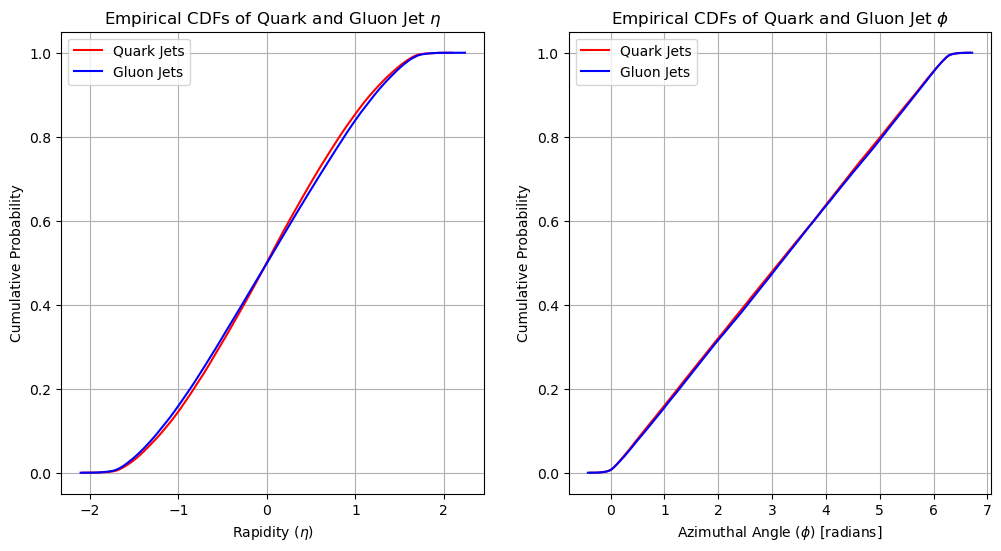

KS Statistic (eta): 0.0178
P-value (eta): 0.000000
KS Statistic (phi): 0.0065
P-value (phi): 0.000000


In [4]:
# Computing the empirical CDF first for eta
eta_quark_sorted = np.sort(eta_quark)
eta_gluon_sorted = np.sort(eta_gluon)

quark_eta_cdf = np.arange(1, len(eta_quark_sorted) + 1) / len(eta_quark_sorted)
gluon_eta_cdf = np.arange(1, len(eta_gluon_sorted) + 1) / len(eta_gluon_sorted)


# Computing the empirical CDF first for azm (phi)
azm_quark_sorted = np.sort(azm_quark)
azm_gluon_sorted = np.sort(azm_gluon)

quark_azm_cdf = np.arange(1, len(azm_quark_sorted) + 1) / len(azm_quark_sorted)
gluon_azm_cdf = np.arange(1, len(azm_gluon_sorted) + 1) / len(azm_gluon_sorted)


# Plot the CDFs

fig , ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(eta_quark_sorted, quark_eta_cdf, label="Quark Jets", color="red")
ax[0].plot(eta_gluon_sorted, gluon_eta_cdf, label="Gluon Jets", color="blue")
ax[0].set_xlabel("Rapidity ($\eta$)")
ax[0].set_ylabel("Cumulative Probability")
ax[0].set_title("Empirical CDFs of Quark and Gluon Jet $\eta$")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(azm_quark_sorted, quark_azm_cdf, label="Quark Jets", color="red")
ax[1].plot(azm_gluon_sorted, gluon_azm_cdf, label="Gluon Jets", color="blue")
ax[1].set_xlabel("Azimuthal Angle ($\phi$) [radians]")
ax[1].set_ylabel("Cumulative Probability")
ax[1].set_title("Empirical CDFs of Quark and Gluon Jet $\phi$")
ax[1].legend()
ax[1].grid(True)


plt.show()


# KS Test
# eta
ks_stat_eta, p_value_eta = ks_2samp(eta_quark, eta_gluon)

print(f"KS Statistic (eta): {ks_stat_eta:.4f}")
print(f"P-value (eta): {p_value_eta:.6f}")

# azm (phi)
ks_stat_phi, p_value_phi = ks_2samp(azm_quark, azm_gluon)

print(f"KS Statistic (phi): {ks_stat_phi:.4f}")
print(f"P-value (phi): {p_value_phi:.6f}")



# Hypothesis Testing: Comparing Quark and Gluon Jet Distributions

## KS Test on Transverse Momentum ($p_T$)
### Key Observations
- The **Kolmogorov-Smirnov (KS) test** was applied to compare the **$p_T$ distributions** of quark and gluon jets.
- The empirical CDF plot revealed a **clear difference** between the two distributions, with **quark jets tending to have higher transverse momentum**.
- **KS Statistic**: **0.0630**
- **P-value**: **0.000000** (very low)
  
### Conclusion
- Since **p-value < 0.05**, we **reject the null hypothesis**.
- This confirms that **quark and gluon jets have significantly different $p_T$ distributions**.
- **Quark jets generally have higher $p_T$ than gluon jets**, as expected from QCD theory.

---

## KS Test on Rapidity ($\eta$)
### **Key Observations**
- The **KS test was applied to the rapidity ($\eta$) distributions** of quark and gluon jets.
- The **empirical CDFs are similar**, with only a **slight shift** between quark and gluon distributions.
- **KS Statistic**: **0.0178** (small difference)
- **P-value**: **0.000000** (significant)

### Conclusion
- Since **p-value < 0.05**, we **reject the null hypothesis**.
- However, the **KS statistic is small**, indicating that **the difference between quark and gluon rapidity is minor**.
- This suggests that **rapidity alone is not a strong distinguishing feature** between quark and gluon jets.
- **Note**: This analysis uses **raw particle-level $\eta$ values** from **all jets pooled together**, without accounting for per-jet structure or $p_T$ weighting.

---

## KS Test on Azimuthal Angle ($\phi$)
### **Key Observations**
- The **KS test was applied to the azimuthal angle ($\phi$) distributions** of quark and gluon jets.
- The empirical CDF plot showed **almost identical distributions**, confirming that **jets are uniformly distributed in azimuthal space**.
- **KS Statistic**: **0.0065** (extremely small)
- **P-value**: **0.000000** (significant, but not meaningful in this case)

### Conclusion
- Again, since **p-value < 0.05**, we **reject the null hypothesis**.
- However, the **tiny KS statistic confirms that $\phi$ distributions are nearly identical**.
- This makes sense because **jet production is isotropic**, meaning quark and gluon jets are evenly spread in all azimuthal directions.
- **Note**: This also uses **raw particle-level $\phi$**, not $p_T$-weighted or per-jet representations.

---

## Final Conclusion (Global Distributions Only)
- **$p_T$ is the strongest distinguishing feature** between quark and gluon jets at the particle level.
- **Rapidity ($\eta$) shows minor differences** but is not as useful for separation.
- **Azimuthal angle ($\phi$) is nearly identical** for both jets, as expected.

***Our hypothesis testing here only examined global particle-level distributions. We did not yet consider per-jet structure or apply $p_T$ weighting. This is explored in **[Phase2_Feature_Engineering.ipynb](Phase2_Feature_Engineering.ipynb)**.*** 

---

## Next Steps: Jet-wise Feature Engineering
- Based on this, I decided to **zoom in jet-wise**, asking:
  > "What happens within individual jets?"
- We'll examine **$p_T$-weighted jet width in $\eta$ and $\phi$**, which captures how collimated or spread out the jets are.

After that, we will zoom further **into particle-level statistics inside each jet** to explore additional discriminative features.